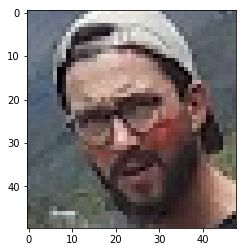

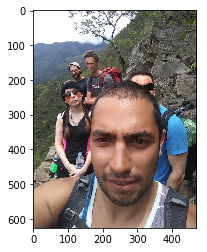

(50, 48)
w:  48 h:  50


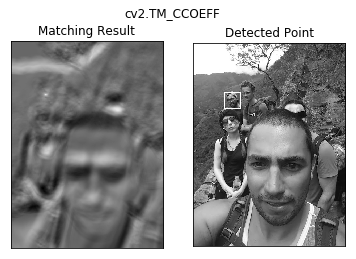

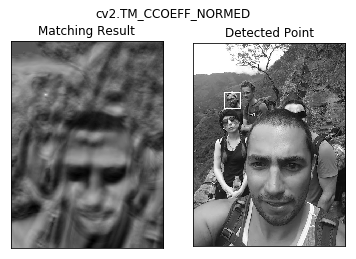

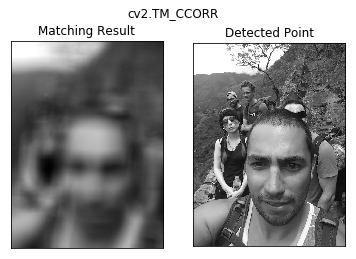

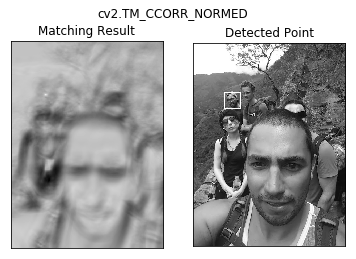

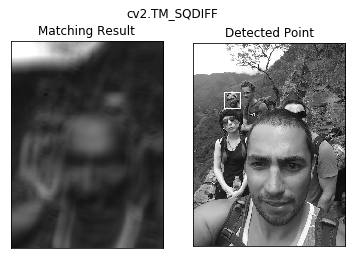

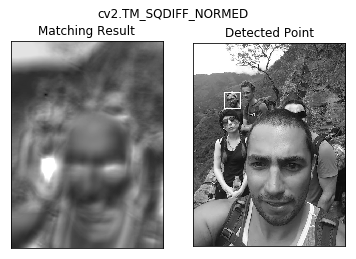

In [6]:
# Name: Shimon Israily
# Class: Advanced python programming - CSC 217. 
# The goal of this program is to get a general understanding how image recognition works with opencv.
# This program uses the opencv library as well as numpy to compare images. 
# To match the images, The program takes the template image and slides it left, right, up and down accross the
# larger source image. The program then compares each individual pixel to see if they're the same.
# Opencv has 6 different methods of doing image recognition. In this program all six methods are used.
# When looking at the results, The matching result images on the right display a bright area where the pixels have the highest match.
# (for sqdiff and sqdiff_normed methods, the matched areas are shown as dark lack spots.) 
# Its important for the image scale to be the same. If the image scaling is not the same the process might not work.
# Plenty of comments were added below to explain the program in detail. 


# Imports the cv2 library (opencv)
import cv2
# Imports numpy library as np for mathematical computation
import numpy as np

# Imports the matplot lib library for displaying images.
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Imports an the mainpic and template images using the imread method in the cv2 library. 
# (Note: Those images were placed at the same location of the source file.)
# The image 'mainpic.jpg' is sent as the first argument. 
# The second argument, 0, is a flag that tells the calling function how to process the image.
# 1 for color, 0 for grayscale, and -1 loads the image as is. Grayscale processing was used here.
img = cv2.imread('mainpic.jpg',0)
img1 = mpimg.imread('templatepic.jpg',0)

# Makes a copy of the image
img2 = img.copy()

# Gets the templatepic.jpg image using imread and stores it into the template variable. 
template = cv2.imread('templatepic.jpg',0)
template1 = mpimg.imread('mainpic.jpg',0)

# This function uses the shape attribute to reverse the width and hight variables.
w, h = template.shape[::-1]

# Displays im1 by sending im1 into the imshow method within the matplotlib class.
plt.imshow(img1)
plt.show()
plt.imshow(template1)
plt.show()

# The shape attribute, within the template object is called. This displays the templates image size (length x width). 
print(template.shape)
print('w: ', w, 'h: ', h)


# All 6 template matching methods available in openCV are used.
# The method types are placed in the 'methods' list.

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Loops through each element within the methods list. Each iternation will correspond to a
# different template matching method.
for meth in methods:
    
    
    img = img2.copy()
    
    # The eval function evaluates the current element iterated. It then assignes a value from 0 to 5, corresponding to the 
    # method type number (This is used as an argument for the cv.matchTemplate method)
    method = eval(meth)

    # The img and template variables, containing the source and template images, are sent to the matchTemplate method
    # within the cv2 library for processing. The returned image is assigned to the res variable. 
    res = cv2.matchTemplate(img,template,method)
    
    # The res variable is then sent to the minMaxLoc method to find where the minimum and maximum values are located.
    # This is where the rectangle square will be drawn. 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method that is currently iterating through is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # uses the cv2 library to create a rectagle around the area both pictures are similar. 
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    # uses the plt library to display the images.
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()